Data Inspection:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143976 entries, 0 to 143975
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Grid ID 2019          143976 non-null  int64  
 1   LAEI 1km2 ID          143976 non-null  int64  
 2   Easting               143976 non-null  int64  
 3   Northing              143976 non-null  int64  
 4   Borough               143976 non-null  object 
 5   Zone                  143976 non-null  object 
 6   Main Source Category  143976 non-null  object 
 7   Sector                143976 non-null  object 
 8   Source                143976 non-null  object 
 9   co2                   112836 non-null  float64
 10  nox                   123216 non-null  float64
 11  pm10                  140516 non-null  float64
 12  pm2.5                 140516 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 14.3+ MB
None
        Grid ID 2019   L

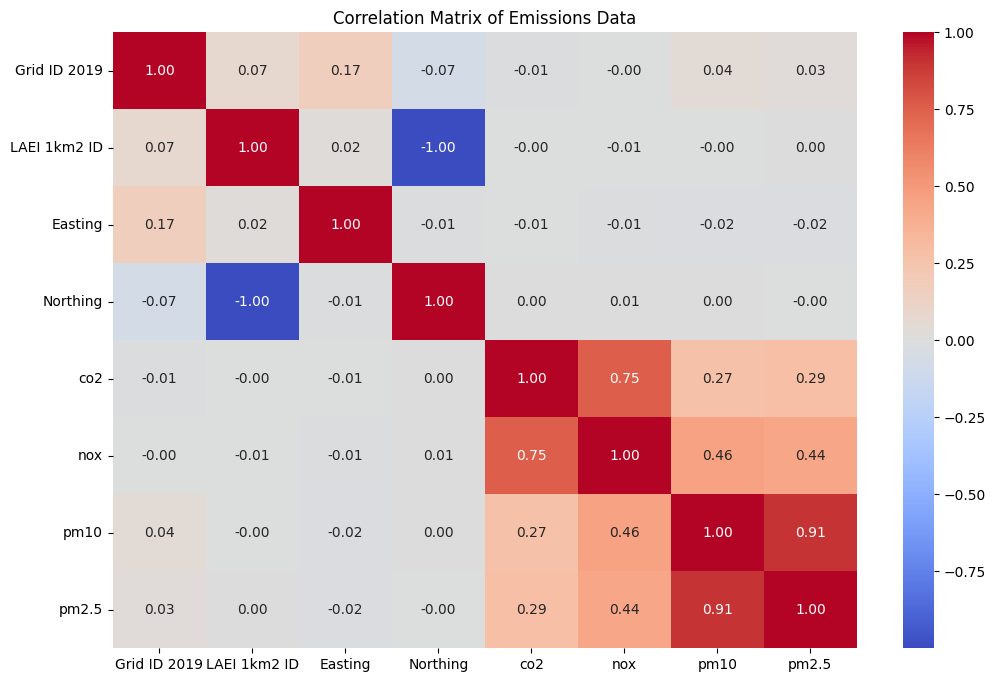


Key Findings:
 {'Total Records': 114419, 'Missing Values After Cleaning': np.int64(0), 'Duplicate Records After Cleaning': np.int64(0), 'Correlation Matrix':               Grid ID 2019  LAEI 1km2 ID   Easting  Northing       co2  \
Grid ID 2019      1.000000      0.071892  0.166238 -0.070784 -0.012293   
LAEI 1km2 ID      0.071892      1.000000  0.020693 -0.999977 -0.002959   
Easting           0.166238      0.020693  1.000000 -0.013983 -0.005262   
Northing         -0.070784     -0.999977 -0.013983  1.000000  0.002924   
co2              -0.012293     -0.002959 -0.005262  0.002924  1.000000   
nox              -0.001698     -0.005507 -0.010194  0.005439  0.750633   
pm10              0.041127     -0.002612 -0.016724  0.002500  0.266758   
pm2.5             0.025504      0.001485 -0.015687 -0.001590  0.285078   

                   nox      pm10     pm2.5  
Grid ID 2019 -0.001698  0.041127  0.025504  
LAEI 1km2 ID -0.005507 -0.002612  0.001485  
Easting      -0.010194 -0.016724 -0.015

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the filtered CSV file
df_filtered = pd.read_csv('Emissions_by_Grid_ID_2019_filtered.csv')

# Data inspection
print("Data Inspection:")
print(df_filtered.info())
print(df_filtered.describe())

# Check for missing values
missing_values = df_filtered.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Check for duplicates
duplicates = df_filtered.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Data consistency and accuracy checks
print("\nData Consistency and Accuracy Checks:")
print(df_filtered.head())

# Identify numeric columns
numeric_cols = df_filtered.select_dtypes(include=[np.number]).columns
print("\nNumeric Columns:\n", numeric_cols)

# Handle missing values using SimpleImputer from sklearn
if not numeric_cols.empty:
    imputer_mean = SimpleImputer(strategy='mean')
    df_filtered[numeric_cols] = imputer_mean.fit_transform(df_filtered[numeric_cols])

categorical_cols = df_filtered.select_dtypes(include=['object']).columns
if not categorical_cols.empty:
    imputer_mode = SimpleImputer(strategy='most_frequent')
    df_filtered[categorical_cols] = imputer_mode.fit_transform(df_filtered[categorical_cols])

# Remove duplicate records
df_cleaned = df_filtered.drop_duplicates()

# Handle outliers using IQR method, only for numeric columns
if not numeric_cols.empty:
    Q1 = df_cleaned[numeric_cols].quantile(0.25)
    Q3 = df_cleaned[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    df_outliers_removed = df_cleaned[~((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
else:
    df_outliers_removed = df_cleaned

# Ensure data consistency and completeness
df_final = df_outliers_removed.dropna()

# Save the cleaned data as a CSV file
df_final.to_csv('Emissions_by_Grid_ID_2019_cleaned.csv', index=False)
print("The cleaned data has been saved to 'Emissions_by_Grid_ID_2019_cleaned.csv'.")

# Review the cleaned data
print("\nCleaned Data Inspection:")
print(df_final.info())
print(df_final.describe())

# Correlation analysis, only for numeric columns
if not numeric_cols.empty:
    correlation_matrix = df_final[numeric_cols].corr()
    print("\nCorrelation Matrix:\n", correlation_matrix)

    # Plot the correlation matrix if it's not empty
    if not correlation_matrix.empty:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix of Emissions Data')
        plt.show()
    else:
        print("Correlation matrix is empty. No plot will be generated.")
else:
    print("No numeric columns available for correlation analysis.")

# Summarize key findings
key_findings = {
    "Total Records": len(df_final),
    "Missing Values After Cleaning": df_final.isnull().sum().sum(),
    "Duplicate Records After Cleaning": df_final.duplicated().sum(),
    "Correlation Matrix": correlation_matrix if not numeric_cols.empty else "No numeric columns available"
}

print("\nKey Findings:\n", key_findings)